In [47]:
import torch
import torch.optim as optim
import torch.nn as nn 
from pytorch_accelerated.schedulers import CosineLrScheduler
from torch.nn.utils import parameters_to_vector
import matplotlib.pyplot as plt

In [48]:
class EasyModel(nn.Module):
    def __init__(self):
        super(EasyModel, self).__init__()
        self.easy_model = self.__create_model__()
    
    def __create_model__(self):
        easy_model = nn.Sequential(
            # Conv2d [in_channels, out_channels, kernel_size, stride, padding, bias]

            # CNNBlock 1
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding='same', bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding='same', bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # HEAD
            nn.AdaptiveAvgPool2d(output_size=(1,1)),
            nn.Flatten(),
            nn.Linear(in_features=16, out_features=2), 
            nn.ReLU(),            
        )
        return easy_model 
      
    def forward(self, x):
        y = self.easy_model(x)
        return y     

In [49]:
model = EasyModel()

optimizer = optim.Adam(model.parameters(), 
                       lr=1e-3, 
                       weight_decay=0)

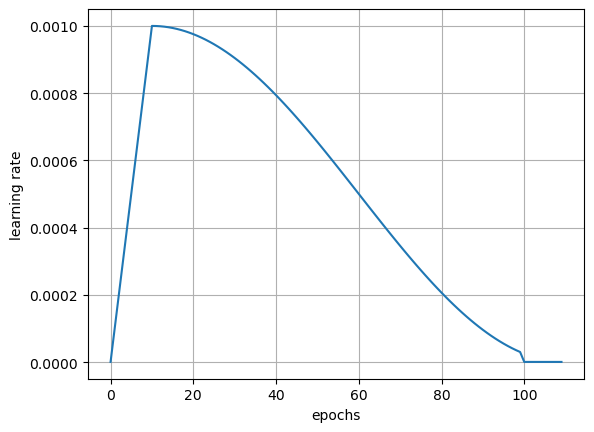

In [50]:
num_epochs = 110
num_steps_per_epoch = 10

scheduler = CosineLrScheduler(optimizer, 
                              total_num_epochs=num_epochs, 
                              num_update_steps_per_epoch=1, 
                              num_warmup_epochs=10)
lrs = []

for epoch in range(num_epochs):
    #for i in range(num_steps_per_epoch):
    scheduler.step()
    lrs.append(optimizer.param_groups[0]['lr'])

fig, ax = plt.subplots(1)
ax.plot(lrs)
ax.set_xlabel('epochs')
ax.set_ylabel('learning rate')
plt.grid()
plt.show()

In [51]:
print(lrs)

[1e-06, 0.00010090000000000001, 0.00020080000000000003, 0.0003007000000000001, 0.0004006000000000001, 0.0005005000000000001, 0.0006004000000000002, 0.0007003000000000002, 0.0008002000000000002, 0.0009001000000000001, 0.001, 0.0009997535269026829, 0.0009990143508499217, 0.0009977832013192385, 0.0009960612933065818, 0.0009938503261272714, 0.00099115248173898, 0.0009879704225884043, 0.0009843072889837512, 0.000980166695995633, 0.0009755527298894294, 0.0009704699440926358, 0.0009649233547011816, 0.0009589184355291487, 0.0009524611127067769, 0.0009455577588320898, 0.0009382151866819099, 0.00093044064248847, 0.0009222417987882566, 0.0009136267468501438, 0.0009046039886902864, 0.0008951824286816573, 0.0008853713647665069, 0.0008751804792804147, 0.0008646198293969952, 0.0008536998372026805, 0.0008424312794113801, 0.0008308252767291642, 0.0008188932828794706, 0.0008066470732996619, 0.0007940987335200905, 0.0007812606472371394, 0.0007681454840920089, 0.0007547661871673105, 0.0007411359602138069,